In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={"axes.facecolor":"white", "axes.edgecolor":"black"})
plt.style.use(["default"])

In [3]:
x=np.array([2,1])
np.linalg.norm(x)

2.23606797749979

In [5]:
a=np.array([1,1])
b=np.array([-1,1])
a @ b #0
# 값이 0으로 직교한다는 것을 알 수 있음

0

## 추천시스템(CF 기반)
    - CF : 유사도 기반 평점 예측, 영화 추천, 음악 추천,....등에 활용할 수 있음
    - 사용자 기반/아이템(하이브리드)기반 CF
    - 아이템 기반 : 사용자 정보가 부족할 때, 
    - 여러 트랜잭션에서 중복 아이템이 적은 경우(의미 있는 데이터 추출이 어려운 경우)
        - 홍길동(트랜잭션):A,B(아이템)  
        - 임꺽정:C,D
        - 이순신:E,F
    - 트랜잭션끼리 중복이 많이 될수록 좋음. 
    - 중복이 많으면 아이템을 추천해줄 때, 중복이 많이 된 아이템을 추천해주고, 중복이 많지 않으면, 어떤 트랙잭션의 비슷한 성향의 트랙잭션의 아이템을 추천해줌 


In [238]:
critics={
    'BTS':{'암수살인':5, '바울':4, '할로윈':1.5},
    '손흥민':{'바울':5, '할로윈':2},
    '조용필':{'암수살인':2.5, '바울':2, '할로윈':1},
    '나훈아':{'암수살인':3.5, '바울':4, '할로윈':5}
}

In [239]:
print(critics.get('BTS'))
print(critics['BTS'])

{'암수살인': 5, '바울': 4, '할로윈': 1.5}
{'암수살인': 5, '바울': 4, '할로윈': 1.5}


In [240]:
# print(critics.get('BTS2')) #None, if문 쓸 때, None을 쓰면 false로 출력
# print(critics['BTS2']) #에러

In [241]:
print(critics.get('BTS').get('암수살인'))

5


In [242]:
# 피타고라스(2차원) => 거리를 구해 유사도 ㅎ확인
from math import sqrt
sqrt(pow(1,2)+pow(3,2)) #pow는 제곱을 나타냄 (1^2+3^2)

3.1622776601683795

In [243]:
def sim(i,j):
    return sqrt(pow(i,2)+pow(j,2))

In [244]:
var1=critics['손흥민']['바울']-critics['조용필']['바울']
var2=critics['손흥민']['할로윈']-critics['조용필']['할로윈']
sim(var1,var2) # 두 사람 사이의 거리

3.1622776601683795

In [245]:
# 손흥민과 다른 사람과의 거리 구하는 for문
for i in critics: #i:키
    #손흥민과 다른 사람과의 거리
    if i != '손흥민':
        var1=critics['손흥민']['바울']-critics[i]['바울']
        var2=critics['손흥민']['할로윈']-critics[i]['할로윈']
        print(i, ":", sim(var1,var2))
# 문제점 : 특정 영화 평점에 의해서 전체 거리가 크게 영향을 받을 수 있음
# 10편 영화, 100점 만점 평점
# 9편의 영화, 손, BTS : 동일한 평점
# 1편의 영화, 손:0점, BTS:100점
# 영화 평점에 의해서 전체 거리가 영향을 크게 받아 1편의 영화의 의해 거리가 멀어질 수 있음.
# 이를 보완하고자 표준화, 정균화 등을 통해 데이터를 전처리할 수 있음

BTS : 1.118033988749895
조용필 : 3.1622776601683795
나훈아 : 3.1622776601683795


In [246]:
# 정규화
for i in critics: #i:키
    #손흥민과 다른 사람과의 거리
    if i != '손흥민':
        var1=critics['손흥민']['바울']-critics[i]['바울']
        var2=critics['손흥민']['할로윈']-critics[i]['할로윈']
        print(i, ":", 1/(1+sim(var1,var2)))
# 유사도가 높을 수록 값이 크게 나옴

BTS : 0.4721359549995794
조용필 : 0.2402530733520421
나훈아 : 0.2402530733520421


In [247]:
def sim_distance(data,user1,user2):
    # 유클리디안 기반 거리(같은 영화 본 것에 대한)
    rsum=0
    for i in data[user1]: # i:손흥민이 본 영화 중 한편
        if i in data[user2]: # 손흥민이 본 영화 중 bts가 본 영화
            rsum+=pow(data[user1][i]-data[user2][i],2)
    return 1/(1+sqrt(rsum))
    
sim_distance(critics,'손흥민','BTS')
# 거리가 가까울수록 값이 크게 나옴

0.4721359549995794

In [237]:
# 인원에 상관없이
# 정렬 -> 가장 유사한 상위 n명 추출하는 기능 
# prototype
# top_match(영화평점 딕셔너리, 기준이 되는 사람(손흥민), 상위 N명, 적용하고자 하는 함수)

In [58]:
def top_match(data,name,n=2, sim_f=sim_distance): # default가 2이라는 의미
        myList=[]
        for i in data:
            if name !=i:
                myList.append((sim_f(data,name,i),i))

        myList.sort()
        myList.reverse()
        return myList[:n]
    

top_match(critics, "손흥민")
# 출력예시
# 유사도, 이름
# 유사도, 이름

[(0.4721359549995794, 'BTS'), (0.2402530733520421, '조용필')]

In [69]:
# 솽관관계
critics = {
    '조용필': {
        '택시운전사': 2.5,
        '겨울왕국': 3.5,
        '리빙라스베가스': 3.0,
        '넘버3': 3.5,
        '사랑과전쟁': 2.5,
        '세계대전': 3.0,
    },
    'BTS': {
        '택시운전사': 1.0,
        '겨울왕국': 4.5,
        '리빙라스베가스': 0.5,
        '넘버3': 1.5,
        '사랑과전쟁': 4.5,
        '세계대전': 5.0,
    },
    '강감찬': {
        '택시운전사': 3.0,
        '겨울왕국': 3.5,
        '리빙라스베가스': 1.5,
        '넘버3': 5.0,
        '세계대전': 3.0,
        '사랑과전쟁': 3.5,
    },
    '을지문덕': {
        '택시운전사': 2.5,
        '겨울왕국': 3.0,
        '넘버3': 3.5,
        '세계대전': 4.0,
    },
    '김유신': {
        '겨울왕국': 3.5,
        '리빙라스베가스': 3.0,
        '세계대전': 4.5,
        '넘버3': 4.0,
        '사랑과전쟁': 2.5,
    },
    '유성룡': {
        '택시운전사': 3.0,
        '겨울왕국': 4.0,
        '리빙라스베가스': 2.0,
        '넘버3': 3.0,
        '세계대전': 3.5,
        '사랑과전쟁': 2.0,
    },
    '이황': {
        '택시운전사': 3.0,
        '겨울왕국': 4.0,
        '세계대전': 3.0,
        '넘버3': 5.0,
        '사랑과전쟁': 3.5,
    },
    '이이': {'겨울왕국': 4.5, '사랑과전쟁': 1.0,
             '넘버3': 4.0},
}

In [92]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [93]:
import matplotlib.pyplot as plt

[0, 5, 0, 5]

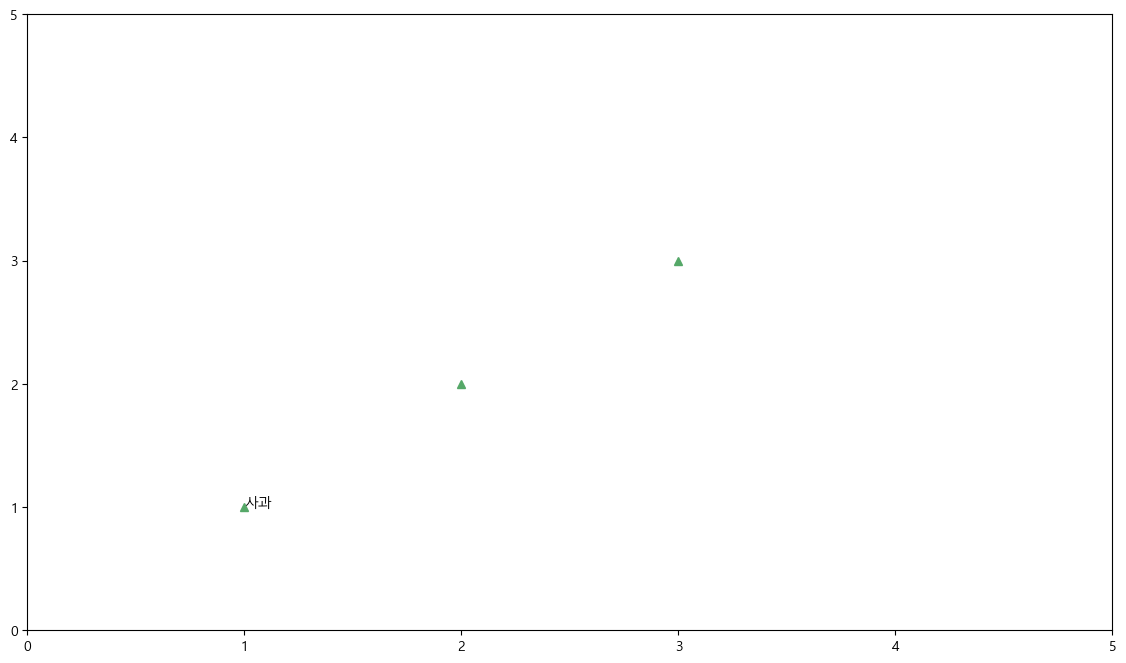

In [94]:
plt.figure(figsize=(14,8))
plt.plot([1,2,3],[1,2,3],'g^')
#   plot [손흥민 평점],[이순신 평점],)
plt.text(1,1,"사과")
plt.axis([0,5,0,5])

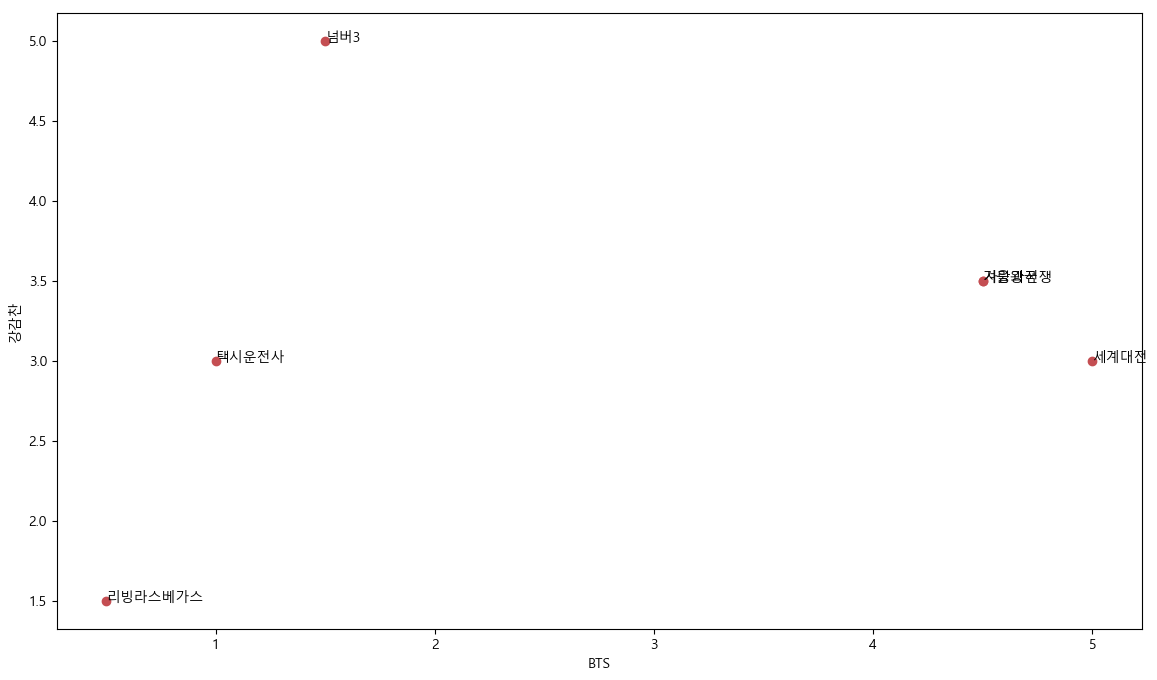

In [95]:
# 각 사람의 평점을 축으로 하고, 두 사람이 동시에 본 영화에 대해서 그래프에 출력
def drawGraph(data,name1,name2):
    li1=[]
    li2=[]
    plt.figure(figsize=(14,8))
#    print(data[name1]["겨울왕국"]) #4.5
#    print(data[name2]["겨울왕국"]) #3.5
    for i in data[name1]:
#         print(i) : bts 본 영화제목 출력
        if i in data[name2]:
            li1.append(data[name1][i])
            li2.append(data[name2][i])
            plt.text(data[name1][i],data[name2][i],i) # 영화제목 추가 
    plt.plot(li1,li2,'ro')
    plt.xlabel(name1)
    plt.ylabel(name2)
    
drawGraph(critics,"BTS","강감찬")

In [172]:
# 두 사람의 상관계수가 출력
# 'BTS'와 나머지 전체 사람들과의 상관계수
# 함수를 만들때 어떤 변수들이 있는지 생각해볼 것!
def sim_pearson(data,name1,name2):
    sumX=0 # X의 합
    sumY=0 # Y의 합
    sumPowX=0 # X 제곱의 합
    sumPowY=0 # Y 제곱의 합
    sumXY=0 # X*Y의 합
    count=0 #영화 개수
    
    for i in data[name1]: # i = key
        if i in data[name2]: # 같은 영화를 평가했을때만
            sumX+=data[name1][i]
            sumY+=data[name2][i]
            sumPowX+=pow(data[name1][i],2)
            sumPowY+=pow(data[name2][i],2)
            sumXY+=data[name1][i]*data[name2][i]
            count+=1
    
    return ( sumXY- ((sumX*sumY)/count) )/ sqrt( (sumPowX - (pow(sumX,2) / count)) * (sumPowY - (pow(sumY,2)/count)))

In [173]:
sim_pearson(critics,'BTS','강감찬')
# 두 사람의 상관계수가 출력
# 'BTS'와 나머지 전체 사람들과의 상관계수
# 전체에 대해 상관계수(상위 n개 상관계수 리스트 출력)

0.21693045781865616

In [174]:
def top_match(data,name,n=3, sim_f=sim_pearson): # default가 3이라는 의미
        myList=[]
        for i in data:
            if name !=i:
                myList.append((sim_f(data,name,i),i))
        myList.sort()
        myList.reverse()
        return myList[:n]

In [176]:
top_match(critics, "강감찬",3)

[(0.963795681875635, '이황'),
 (0.39605901719066977, '조용필'),
 (0.38124642583151164, '이이')]

### 1. 추천시스템 (연습문제)
    1) 예상평점 구해보자
    - 예상점수 : 유사도 * (상대방의) 평점
    ex) '강감찬'이 안본 영화 중 'A' 영화를 다른 사람들과 각각 4,3,2점 평점 줬다고 가정.
    유사도를 구해보니 0.9, 0.3, 0.7로 나왔다면,
    0.9*4점 => 3.6점 예상
    0.3*3점 => 0.9점 예상
    0.7.2점 => 1.4점 예상
    예상점수 총합 = 5.9점(예상점수합) / 1.9점(유사도합)
    => 약 3점
    ...
    만약 A영화 3점, B영화 2점, C영화 4점으로 예상됐다면 강감찬에게 'C' 영화를 추천

In [178]:
def getRec():
    #구현

SyntaxError: unexpected EOF while parsing (<ipython-input-178-3a3bbec2bd2f>, line 2)

In [180]:
train=pd.read_csv("data/house-prices-advanced-regression-techniques/train.csv")
test=pd.read_csv("data/house-prices-advanced-regression-techniques/test.csv")

In [183]:
train.head()
test.head()
train_id=train['Id'] 
test_id=test['Id']

In [184]:
train.drop("Id",axis=1, inplace=True) # 분석 시, id 열은 안쓸 것 같아서 제외
test.drop("Id",axis=1, inplace=True)

In [186]:
train.head()
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

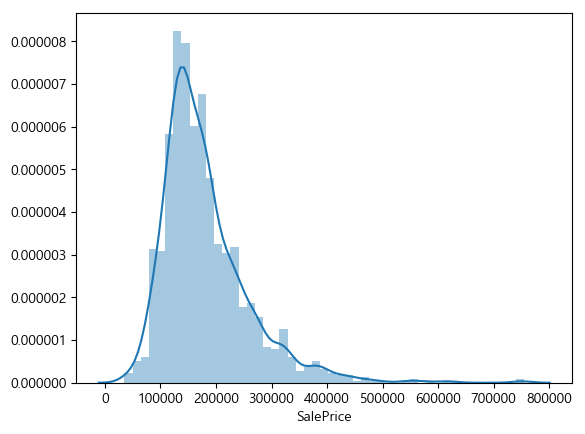

In [188]:
sns.distplot(train["SalePrice"])

In [193]:
ntrain=train.shape[0] #(1460, 80)  train 데이터 건수 저장
ntest=test.shape[0] #(1459, 79) test 데이터 건수 저장
ytrain=train.SalePrice.values

In [194]:
# 트레이닝 + 테스트 => null 처리

In [200]:
# 각 데이터의 index 무시
# pd.concat((train,test), ignore_index=True)

In [204]:
allData=pd.concat((train,test)).reset_index(drop=True)
allData.head()
allData.shape # null 처리를 한꺼번에 하기 위해 데이터 합치기

(2919, 80)

In [209]:
# null 개수 확인
allData.isnull().sum()
allNa=(allData.isnull().sum()/len(allData))*100 # null값을 전체 데이터의 차지하는 비율
allNa # na 비율

1stFlrSF          0.000000
2ndFlrSF          0.000000
3SsnPorch         0.000000
Alley            93.216855
BedroomAbvGr      0.000000
BldgType          0.000000
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinSF1        0.034258
BsmtFinSF2        0.034258
BsmtFinType1      2.706406
BsmtFinType2      2.740665
BsmtFullBath      0.068517
BsmtHalfBath      0.068517
BsmtQual          2.774923
BsmtUnfSF         0.034258
CentralAir        0.000000
Condition1        0.000000
Condition2        0.000000
Electrical        0.034258
EnclosedPorch     0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
Fence            80.438506
FireplaceQu      48.646797
Fireplaces        0.000000
Foundation        0.000000
FullBath          0.000000
                   ...    
LotShape          0.000000
LowQualFinSF      0.000000
MSSubClass        0.000000
MSZoning          0.137033
MasVnrArea        0.787941
MasVnrType        0.822199
M

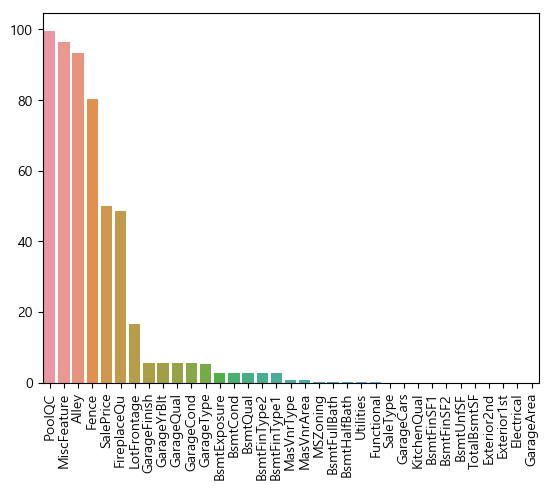

In [235]:
# 문제
# na 비율을 기준으로 내림차순 정렬
# na비율이 0인 컬럼들은 제외

# 출력
# Poolqc       99.8657528
# MiscFeature  96.402878
# ....
# 값이 0인 행을 빼기 위해서 index 값으로 제거해야함
allNa=allNa.drop(allNa[allNa==0].index).sort_values(ascending=False)
allNa
missingData=pd.DataFrame({"NA Ratio":allNa})
missingData
plt.xticks(rotation="90")
sns.barplot(x=allNa.index, y=allNa)